In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/config/workspace/dataset/data.csv')

In [5]:
df=df.drop(columns=['Dysphasia','Dysarthria','Vertigo','Tinnitus','Hypoacusis','Diplopia','Defect','Ataxia','DPF','Character','Paresthesia'])

In [6]:
df.head()

,Age,Duration,Frequency,Location,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Conscience,Type
0,30,1,5,1,2,1,0,1,1,1,2,0,Typical aura with migraine
1,50,3,5,1,3,1,1,1,1,2,1,0,Typical aura with migraine
2,53,2,1,1,2,1,1,1,1,2,0,0,Typical aura with migraine
3,45,3,5,1,3,1,0,1,1,2,2,0,Typical aura with migraine
4,53,1,1,1,2,1,0,1,1,4,0,0,Typical aura with migraine


In [7]:
df.describe()

,Age,Duration,Frequency,Location,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Conscience
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,2.47000,0.987500,0.322500,0.977500,0.980000,1.48750,0.302500,0.017500
std,12.139043,0.770964,1.675947,0.268186,0.76849,0.111242,0.468019,0.148489,0.140175,0.99111,0.609855,0.131289
min,15.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,2.00000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,2.00000,0.000000,0.000000
max,77.000000,3.000000,8.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Intensity    400 non-null    int64 
 5   Nausea       400 non-null    int64 
 6   Vomit        400 non-null    int64 
 7   Phonophobia  400 non-null    int64 
 8   Photophobia  400 non-null    int64 
 9   Visual       400 non-null    int64 
 10  Sensory      400 non-null    int64 
 11  Conscience   400 non-null    int64 
 12  Type         400 non-null    object
dtypes: int64(12), object(1)
memory usage: 40.8+ KB


## We have Type as object type so we have to convert it to numerical type using label encoding

In [9]:
df.Type.unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['Type']=encoder.fit_transform(df['Type'])

In [13]:
df.Type.unique()

array([5, 2, 0, 4, 1, 3, 6])

In [14]:
df.duplicated().isnull().sum()

0

## dividing dataset into  dependent and independent variable

In [15]:
x=df.drop(['Type'],axis=1)
y=df['Type']

In [16]:
x

,Age,Duration,Frequency,Location,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Conscience
0,30,1,5,1,2,1,0,1,1,1,2,0
1,50,3,5,1,3,1,1,1,1,2,1,0
2,53,2,1,1,2,1,1,1,1,2,0,0
3,45,3,5,1,3,1,0,1,1,2,2,0
4,53,1,1,1,2,1,0,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,3,1,1,1,1,1,1,0
396,20,3,2,1,3,1,0,1,1,2,0,0
397,28,3,2,1,3,1,0,1,1,1,0,0
398,20,3,1,1,3,1,0,1,1,3,1,0


In [17]:
y

0      5
1      5
2      5
3      5
4      5
      ..
395    0
396    0
397    0
398    0
399    0
Name: Type, Length: 400, dtype: int64

In [18]:
y.value_counts()

Type
5    247
2     60
1     24
6     20
0     18
3     17
4     14
Name: count, dtype: int64

## Dependent variable is not balanced so we have to balance it

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote=SMOTE()

In [23]:
x,y=smote.fit_resample(x,y)

In [24]:
y.value_counts()

Type
5    247
2    247
0    247
4    247
1    247
3    247
6    247
Name: count, dtype: int64

## Dividind data into train and test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [27]:
x_train.shape,y_train.shape

((1210, 12), (1210,))

In [28]:
x_test.shape,y_test.shape

((519, 12), (519,))

## Data visualization

<Axes: xlabel='Type', ylabel='count'>

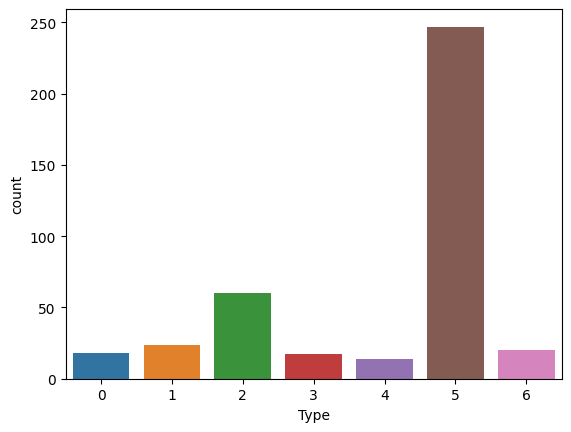

In [29]:
sns.countplot(x=df['Type'])

In [30]:
## But now we have oversampled it using SMOTE technique

<Axes: >

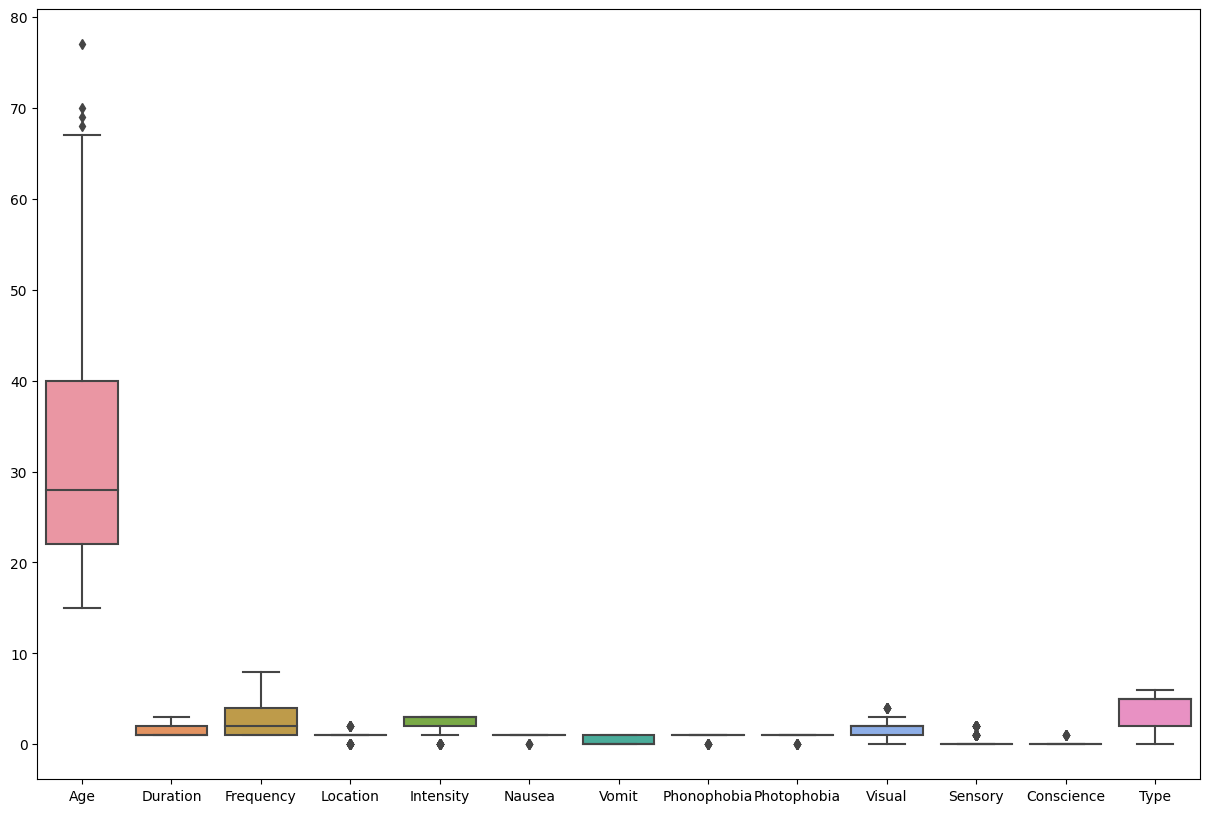

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

## we can See outliers are also present here so we will normalize them using

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
x_train_scaled=scaler.fit_transform(x_train)

In [35]:
x_test_scaled=scaler.transform(x_test)

## lets train out model and predict output

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dtc=DecisionTreeClassifier()

In [38]:
## Hyperparameter Tuning
parameter={'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':[1,2,3,4,5]}


gsc=GridSearchCV(dtc,param_grid=parameter,verbose=3,refit=True,cv=5)

In [39]:
import warnings
warnings.filterwarnings('ignore')
gsc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [40]:
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [41]:
gsc.best_score_

0.6570247933884298

## Above are the best patameters which will give the best score

In [42]:
decision_tree_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')

In [43]:
decision_tree_classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

In [44]:
y_pred=decision_tree_classifier.predict(x_test_scaled)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[40 11  1 26  0  8  0]
 [28 30  0  3  6  0  0]
 [13  0 46  6  0  0  0]
 [ 4  0  0 69  0  3  0]
 [14 36  4  0 31  0  0]
 [12 13  1 21  0 19  0]
 [ 0  0  0  0  0  0 74]]
0.5953757225433526
              precision    recall  f1-score   support

           0       0.36      0.47      0.41        86
           1       0.33      0.45      0.38        67
           2       0.88      0.71      0.79        65
           3       0.55      0.91      0.69        76
           4       0.84      0.36      0.51        85
           5       0.63      0.29      0.40        66
           6       1.00      1.00      1.00        74

    accuracy                           0.60       519
   macro avg       0.66      0.60      0.60       519
weighted avg       0.65      0.60      0.59       519



In [47]:
dt=DecisionTreeClassifier()

In [48]:
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [49]:
prrr=dt.predict(x_test_scaled)

In [50]:
accuracy_score(y_test,y_pred)

0.5953757225433526

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
parameter={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion':['gini','entropy']}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rfc=RandomForestClassifier()

In [55]:
rsc=RandomizedSearchCV(rfc,param_distributions=parameter,cv=5,verbose=3,scoring='accuracy')

In [56]:
rsc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.694 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.740 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.769 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.806 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.715 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.678 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.674 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.690 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.723 total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [57]:
rsc.best_params_

{'n_estimators': 200, 'max_depth': None, 'criterion': 'entropy'}

In [58]:
random_forest_cls=RandomForestClassifier(n_estimators=200,max_depth=None,criterion='gini')

In [59]:
random_forest_cls.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=200)

In [60]:
y_pred=random_forest_cls.predict(x_test_scaled)

In [61]:
accuracy_score(y_test,y_pred)

0.8901734104046243

## Using support vector clssifier

In [62]:
from sklearn.svm import SVC

In [63]:
svc=SVC()

In [64]:
svc.fit(x_train_scaled,y_train)

SVC()

In [65]:
pred=svc.predict(x_test_scaled)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,pred)

0.7302504816955684

## Finally we will take Random Forest Classifier as our Prediction Algorithm

In [68]:
import pickle

In [71]:
pickle.dump(random_forest_cls,open('/config/workspace/pickle/rfc_migraine.pkl','wb'))

In [72]:
pickle.dump(scaler,open('/config/workspace/pickle/scaler_migraine.pkl','wb'))

In [209]:
rrr=pickle.load(open('dataset/pickle_files/rfc_migraine.pkl','rb'))

In [226]:
rrr.predict([[20,1,1,2,3,1,0,1,1,0,0,1]])

array([3])

In [225]:
df.head(20)

,Age,Duration,Frequency,Location,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Conscience,Type
0,30,1,5,1,2,1,0,1,1,1,2,0,5
1,50,3,5,1,3,1,1,1,1,2,1,0,5
2,53,2,1,1,2,1,1,1,1,2,0,0,5
3,45,3,5,1,3,1,0,1,1,2,2,0,5
4,53,1,1,1,2,1,0,1,1,4,0,0,5
5,49,1,1,1,3,1,0,1,1,0,0,0,2
6,27,1,5,1,3,1,0,1,1,2,0,0,0
7,24,1,1,1,2,1,0,1,1,2,2,0,5
8,50,1,5,1,2,1,1,1,1,2,2,0,5
9,23,1,1,1,3,1,1,1,1,2,0,0,5
